In [48]:
# Import modules 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
# from imblearn.over_sampling import SMOTE
# from imblearn.combine import SMOTEENN
# from imblearn.over_sampling import BorderlineSMOTE
# from imblearn.over_sampling import ADASYN
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay


# Part 1 - Training Data

## Data Pre-processing Steps:

Data Cleaning
* Remove rows with unknown values
* Remove duplicate rows
* Remove similar/redundant field

Data Transformation
* Transform fields from categorical data to binary data
* Standardise data

Feature Selection
* Check correlation with label
* Remove feature(s) with low correlation with label

Feature Engineering
* One-hot encoding for categorical features

Sampling
* Oversample minority class



In [25]:
# Read and inspect data
df1 = pd.read_csv("Census Income Data Set/adult.data", sep=", ", names=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"], engine="python")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [26]:
# Remove rows with unknown values: "?"
print(len(df1))
df1.replace(to_replace="?", value=np.nan, inplace=True)
df1_cleaned = df1.dropna()
print(len(df1_cleaned))

32561
30162


In [27]:
# Remove duplicate rows
df1_distinct = df1_cleaned.drop_duplicates()
print(len(df1_distinct))
df1_distinct.shape

30139


(30139, 15)

In [28]:
# Remove similar field: education vs education-num
df1_distinct = df1_distinct.drop(columns=["education"])
df1_distinct

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [29]:
# Transform fields from categorical data to numerical data (binary)
df1_distinct["income"] = df1_distinct["income"].map({"<=50K":0, ">50K":1})
df1_distinct["sex"] = df1_distinct["sex"].map({"Male":0, "Female":1})
print(df1_distinct["income"].unique(), df1_distinct["sex"].unique())

[0 1] [0 1]


C:\Users\yingx\AppData\Local\Temp\ipykernel_28600\3716547723.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix1 = df1_distinct.corr()


[Text(0.5, 1.0, 'Correlation Matrix')]

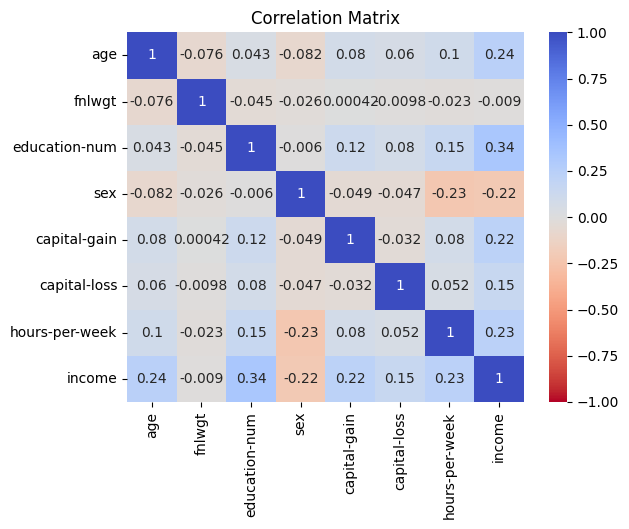

In [30]:
# Check correlation of numerical features with label
correlation_matrix1 = df1_distinct.corr()
sns.heatmap(correlation_matrix1, vmin=-1, vmax=1, cmap="coolwarm_r", annot=True).set(title="Correlation Matrix")

In [31]:
# Remove feature(s) with low correlation with label
df1_distinct = df1_distinct.drop(columns=["fnlwgt"])
df1_distinct = df1_distinct.reset_index(drop=True)
df1_distinct

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,1,0,0,38,United-States,0
30135,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,0,40,United-States,1
30136,58,Private,9,Widowed,Adm-clerical,Unmarried,White,1,0,0,40,United-States,0
30137,22,Private,9,Never-married,Adm-clerical,Own-child,White,0,0,0,20,United-States,0


In [32]:
# Standardise data
scaler = StandardScaler()
columns_to_scale = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
df1_to_scale = df1_distinct[columns_to_scale]
df1_scaled = scaler.fit_transform(df1_to_scale)
df1_scaled = pd.DataFrame(df1_scaled, columns = columns_to_scale)
for col in columns_to_scale: 
    df1_distinct[col] = df1_scaled[col]
df1_distinct

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.042516,State-gov,1.128996,Never-married,Adm-clerical,Not-in-family,White,0,0.145925,-0.218673,-0.078031,United-States,0
1,0.880215,Self-emp-not-inc,1.128996,Married-civ-spouse,Exec-managerial,Husband,White,0,-0.147502,-0.218673,-2.332060,United-States,0
2,-0.033639,Private,-0.440434,Divorced,Handlers-cleaners,Not-in-family,White,0,-0.147502,-0.218673,-0.078031,United-States,0
3,1.108678,Private,-1.225149,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,-0.147502,-0.218673,-0.078031,United-States,0
4,-0.795183,Private,1.128996,Married-civ-spouse,Prof-specialty,Wife,Black,1,-0.147502,-0.218673,-0.078031,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,-0.871338,Private,0.736639,Married-civ-spouse,Tech-support,Wife,White,1,-0.147502,-0.218673,-0.244996,United-States,0
30135,0.118670,Private,-0.440434,Married-civ-spouse,Machine-op-inspct,Husband,White,0,-0.147502,-0.218673,-0.078031,United-States,1
30136,1.489450,Private,-0.440434,Widowed,Adm-clerical,Unmarried,White,1,-0.147502,-0.218673,-0.078031,United-States,0
30137,-1.252110,Private,-0.440434,Never-married,Adm-clerical,Own-child,White,0,-0.147502,-0.218673,-1.747682,United-States,0


In [33]:
# One-hot encoding for categorical features: age, education-num, sex, capital-gain, capital-loss, hours-per-week
df1_onehot = pd.get_dummies(df1_distinct, drop_first=True)
df1_onehot

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.042516,1.128996,0,0.145925,-0.218673,-0.078031,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.880215,1.128996,0,-0.147502,-0.218673,-2.332060,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.033639,-0.440434,0,-0.147502,-0.218673,-0.078031,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1.108678,-1.225149,0,-0.147502,-0.218673,-0.078031,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.795183,1.128996,1,-0.147502,-0.218673,-0.078031,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,-0.871338,0.736639,1,-0.147502,-0.218673,-0.244996,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30135,0.118670,-0.440434,0,-0.147502,-0.218673,-0.078031,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30136,1.489450,-0.440434,1,-0.147502,-0.218673,-0.078031,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30137,-1.252110,-0.440434,0,-0.147502,-0.218673,-1.747682,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
# Features
X_train = df1_onehot.drop(columns=["income"])
# Labels
y_train = df1_onehot["income"]
print(X_train.shape, y_train.shape)
class_prob1 = y_train.value_counts(normalize=True)
class_prob1

(30139, 80) (30139,)


0    0.750954
1    0.249046
Name: income, dtype: float64

In [35]:
'''
# Use SMOTE to undersample majority class
sm = RandomUnderSampler(random_state=1024)
'''
# Oversample minority class
sm = RandomOverSampler(random_state=1024)
# sm = SMOTE(random_state=1024)
# sm = SMOTEENN(random_state=1024)
# sm = BorderlineSMOTE(random_state=1024)
# sm = ADASYN(random_state=1024)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
class_prob1_res = y_train_res.value_counts(normalize=True)
print(class_prob1, class_prob1_res)
X_train_res.shape

0    0.750954
1    0.249046
Name: income, dtype: float64 0    0.5
1    0.5
Name: income, dtype: float64


(45266, 80)

# Part 2 - Testing Data

Apply the same data-processing steps as Training Data.

0    0.754234
1    0.245766
Name: income, dtype: float64


C:\Users\yingx\AppData\Local\Temp\ipykernel_28600\1975145496.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix2 = df2_distinct.corr()


,age,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-1.029269,-1.216355,0,-0.145463,-0.219208,-0.079113,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.057699,-0.434700,0,-0.145463,-0.219208,0.749958,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.805061,0.737782,0,-0.145463,-0.219208,-0.079113,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.390718,-0.043872,0,0.852437,-0.219208,-0.079113,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.356644,-1.607182,0,-0.145463,-0.219208,-0.908184,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15050,-0.431380,1.128610,0,-0.145463,-0.219208,-0.079113,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15051,0.017037,1.128610,1,-0.145463,-0.219208,-0.410741,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15052,-0.057699,1.128610,0,-0.145463,-0.219208,0.749958,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15053,0.390718,1.128610,0,0.562594,-0.219208,-0.079113,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


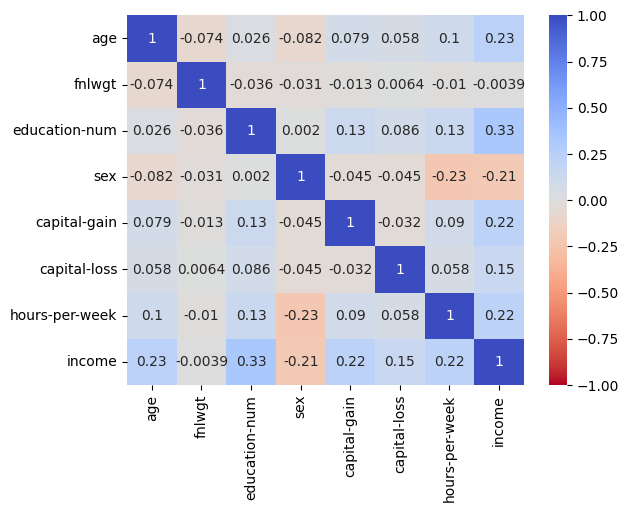

In [36]:
df2 = pd.read_csv("Census Income Data Set/adult.test", sep=", ", names=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"], engine="python", skiprows=1)
df2.replace(to_replace="?", value=np.nan, inplace=True)
df2_cleaned = df2.dropna()
df2_distinct = df2_cleaned.drop_duplicates()
df2_distinct = df2_distinct.drop(columns=["education"])
df2_distinct["income"] = df2_distinct["income"].map({"<=50K.":0, ">50K.":1})
df2_distinct["sex"] = df2_distinct["sex"].map({"Male":0, "Female":1})
correlation_matrix2 = df2_distinct.corr()
sns.heatmap(correlation_matrix2, vmin=-1, vmax=1, cmap="coolwarm_r", annot=True)
df2_distinct = df2_distinct.drop(columns=["fnlwgt"])
df2_distinct = df2_distinct.reset_index(drop=True)
df2_to_scale = df2_distinct[columns_to_scale]
df2_scaled = scaler.fit_transform(df2_to_scale)
df2_scaled = pd.DataFrame(df2_scaled, columns = columns_to_scale)
for col in columns_to_scale: 
    df2_distinct[col] = df2_scaled[col]
df2_onehot = pd.get_dummies(df2_distinct, drop_first=True)
X_test = df2_onehot.drop(columns=["income"])
y_test = df2_onehot["income"]
class_prob2 = y_test.value_counts(normalize=True)
print(class_prob2)
'''
It's found that one of the feature names does not exist in the test data during prediction
ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- native-country_Holand-Netherlands
''' 
# Add the feature and set the value as 0 because it does not exist in any row
X_test["native-country_Holand-Netherlands"] = 0
# Rearrange the order of the columns based on train data
X_test = X_test[X_train.columns]
X_test

# Part 3 - Decision Tree

* Define grid values for tuning model hyperparameters using GridSearchCV
* Get the best params
* Fit the train data using best params
* Evaluate the test data
* Plot the confusion matrix

In [37]:
# Define grid values for tuning model hyperparameters using GridSearchCV
# '''
param_grid_dt = {
	"criterion": ["gini","entropy"], 
	"max_depth": [5,10,15],
	"min_samples_split": [2,5,10],
	"min_impurity_decrease": [0.0,0.1]
}
clf_dt = DecisionTreeClassifier(random_state=1024)
grid_clf_dt = GridSearchCV(estimator=clf_dt, param_grid=param_grid_dt, scoring="accuracy", cv=5)
grid_clf_dt.fit(X_train_res, y_train_res)
# Get the best params
print('Grid best score (accuracy): {}, Grid best parameters: {}'.format(grid_clf_dt.best_score_, grid_clf_dt.best_params_))
# '''
# 51.6s
# Grid best score (accuracy): 0.8582822199808012, Grid best parameters: {'criterion': 'gini', 'max_depth': 15, 'min_impurity_decrease': 0.0, 'min_samples_split': 2}

Grid best score (accuracy): 0.8582822199808012, Grid best parameters: {'criterion': 'gini', 'max_depth': 15, 'min_impurity_decrease': 0.0, 'min_samples_split': 2}


In [38]:
# Fit the train data using best params
best_clf_dt = DecisionTreeClassifier(**grid_clf_dt.best_params_, random_state=1024)
# best_clf_dt = DecisionTreeClassifier(criterion='gini', max_depth=15, min_impurity_decrease=0.0, min_samples_split=2, random_state=1024)
best_clf_dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=15, random_state=1024)

In [39]:
# Evaluate the test data
y_predicted_dt = best_clf_dt.predict(X_test)

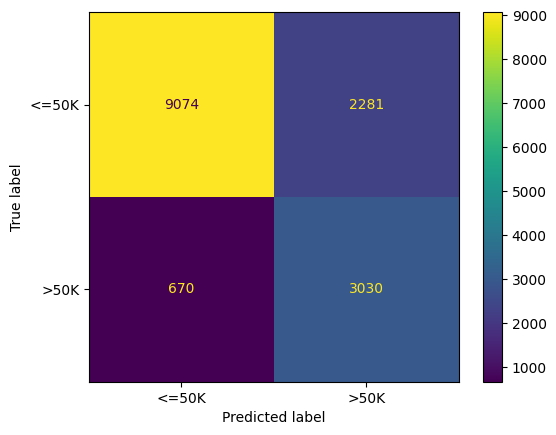

In [40]:
# Plot the confusion matrix
disp_dt = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted_dt, display_labels=["<=50K", ">50K"])

# Part 4 - K-Nearest Neighbors

* Define grid values for tuning model hyperparameters using GridSearchCV
* Fit the train data
* Get the best params
* Evaluate the test data
* Plot the confusion matrix

In [41]:
# Define grid values for tuning model hyperparameters using GridSearchCV
# '''
param_grid_knn = {
	"n_neighbors": [3,5,7], 
	"weights": ["uniform","distance"],
	"leaf_size": [20,30,40],
	"p": [1,2]
}
clf_knn = KNeighborsClassifier()
grid_clf_knn = GridSearchCV(estimator=clf_knn, param_grid=param_grid_knn, scoring="accuracy", cv=5)
grid_clf_knn.fit(X_train_res, y_train_res)
# Get the best params
print('Grid best score (accuracy): {}, Grid best parameters: {}'.format(grid_clf_knn.best_score_, grid_clf_knn.best_params_))
# '''
# 20m 44.2s
# Grid best score (accuracy): 0.8842401999017591, Grid best parameters: {'leaf_size': 20, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

Grid best score (accuracy): 0.8842401999017591, Grid best parameters: {'leaf_size': 20, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [42]:
# Fit the train data using best params
best_clf_knn = KNeighborsClassifier(**grid_clf_knn.best_params_)
# best_clf_knn = KNeighborsClassifier(leaf_size=20, n_neighbors=3, p=1, weights="distance")
best_clf_knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(leaf_size=20, n_neighbors=3, p=1, weights='distance')

In [43]:
# Evaluate the test data
y_predicted_knn = best_clf_knn.predict(X_test)

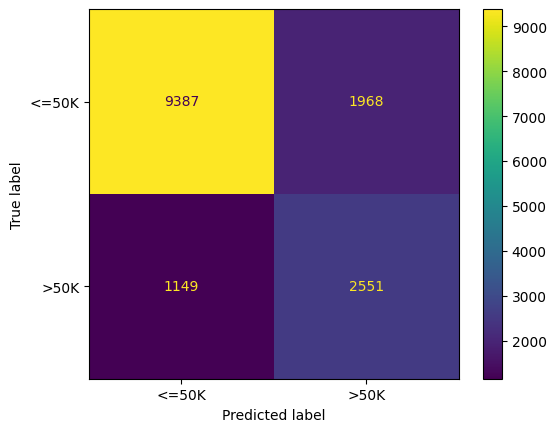

In [44]:
# Plot the confusion matrix
disp_knn = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted_knn, display_labels=["<=50K", ">50K"])

# Part 5 - Comparison

Evaluate performance of classification models 
* Classification metrics: accuracy, precision, recall, f1-score, roc_auc

In [49]:
cm_dt = confusion_matrix(y_test, y_predicted_dt)
acc_dt = accuracy_score(y_test, y_predicted_dt)
pre_dt = precision_score(y_test, y_predicted_dt)
rec_dt = recall_score(y_test, y_predicted_dt)
f1_dt = f1_score(y_test, y_predicted_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_predicted_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
clf_rep_dt = classification_report(y_test, y_predicted_dt)

cm_knn = confusion_matrix(y_test, y_predicted_knn)
acc_knn = accuracy_score(y_test, y_predicted_knn)
pre_knn = precision_score(y_test, y_predicted_knn)
rec_knn = recall_score(y_test, y_predicted_knn)
f1_knn = f1_score(y_test, y_predicted_knn)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_predicted_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
clf_rep_knn = classification_report(y_test, y_predicted_knn)

print('Decision Tree')
print('Accuracy: {:0.2f}, Precision: {:0.2f}, Recall: {:0.2f}, F1: {:0.2f}, AUC: {:0.2f}'.format(acc_dt, pre_dt, rec_dt, f1_dt, roc_auc_dt))
print(cm_dt)
print(clf_rep_dt)
print('K-Nearest Neighbors')
print('Accuracy: {:0.2f}, Precision: {:0.2f}, Recall: {:0.2f}, F1: {:0.2f}, AUC: {:0.2f}'.format(acc_knn, pre_knn, rec_knn, f1_knn, roc_auc_knn))
print(cm_knn)
print(clf_rep_knn)

Decision Tree
Accuracy: 0.80, Precision: 0.57, Recall: 0.82, F1: 0.67, AUC: 0.81
[[9074 2281]
 [ 670 3030]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     11355
           1       0.57      0.82      0.67      3700

    accuracy                           0.80     15055
   macro avg       0.75      0.81      0.77     15055
weighted avg       0.84      0.80      0.81     15055

K-Nearest Neighbors
Accuracy: 0.79, Precision: 0.56, Recall: 0.69, F1: 0.62, AUC: 0.76
[[9387 1968]
 [1149 2551]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86     11355
           1       0.56      0.69      0.62      3700

    accuracy                           0.79     15055
   macro avg       0.73      0.76      0.74     15055
weighted avg       0.81      0.79      0.80     15055



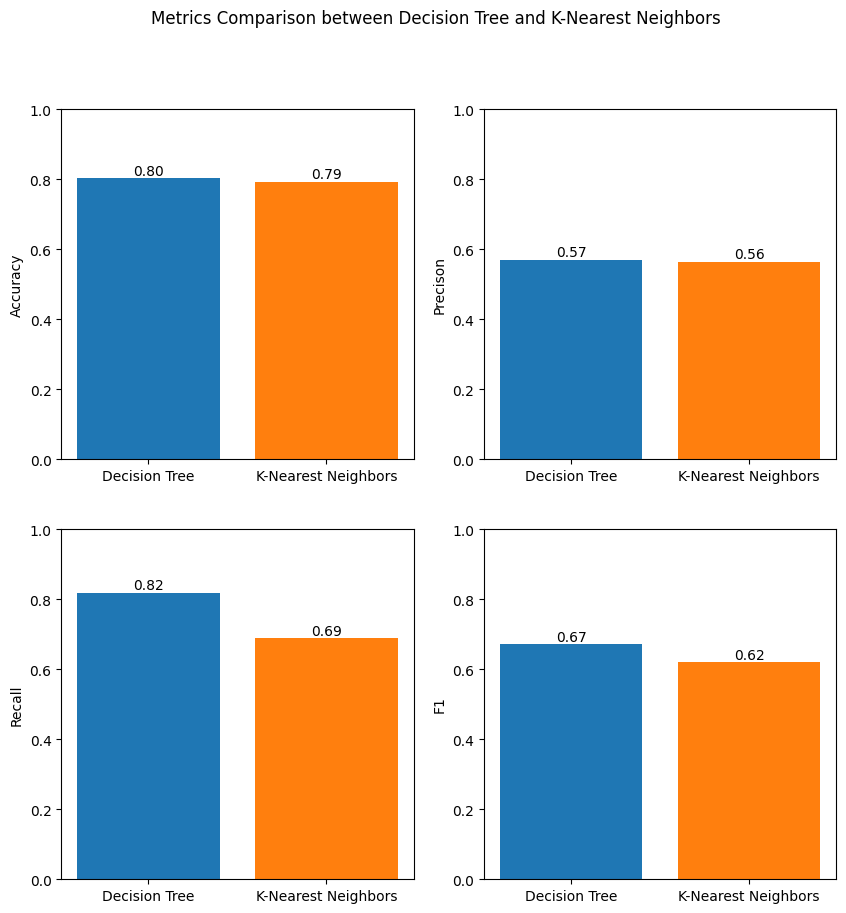

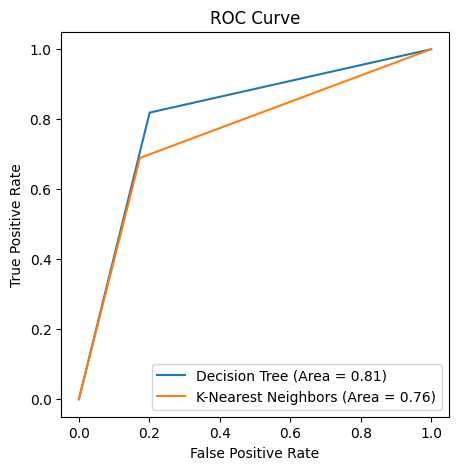

In [46]:
# Metrics Comparison
# Accuracy, Precision, Recall, F1
models = ["Decision Tree", "K-Nearest Neighbors"]
metrics = {
	"Accuracy": [acc_dt, acc_knn],
	"Precison": [pre_dt, pre_knn],
	"Recall": [rec_dt, rec_knn],
	"F1": [f1_dt, f1_knn]
}
fig, axs = plt.subplots(2, 2, figsize=(10,10))
for i, (metric, scores) in enumerate(metrics.items()):
	row, col = i//2, i%2
	axs[row, col].bar(models, scores, color=["#1f77b4", "#ff7f0e"])
	axs[row, col].set_ylabel(metric)
	axs[row, col].set_ylim([0, 1])
	for j, score in enumerate(scores):
		axs[row, col].text(j, score, f'{score:0.2f}', ha="center", va="bottom")
plt.suptitle("Metrics Comparison between Decision Tree and K-Nearest Neighbors")

# ROC_AUC
plt.figure(figsize=(5,5))
plt.plot(fpr_dt, tpr_dt, label = 'Decision Tree (Area = {:0.2f})'.format(roc_auc_dt))
plt.plot(fpr_knn, tpr_knn, label = 'K-Nearest Neighbors (Area = {:0.2f})'.format(roc_auc_knn))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()